In [64]:
import sqlite3
import pandas as pd

In [65]:
housing_database_connect = sqlite3.connect("housing.db")
housing_df = pd.read_sql("SELECT * FROM houses",housing_database_connect)
housing_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,2217,909279080,50,RL,NaN,11275,Pave,None,IR1,HLS,...,0,None,None,None,0,3,2007,WD,Normal,220000
1,837,907126050,20,RL,65.0,9757,Pave,None,Reg,Low,...,0,None,None,None,0,10,2009,WD,Normal,143000
2,2397,528144030,60,RL,86.0,11065,Pave,None,IR1,Lvl,...,0,None,None,None,0,10,2006,New,Partial,281000
3,1963,535452060,20,RL,70.0,7000,Pave,None,Reg,Lvl,...,0,None,MnWw,None,0,4,2007,WD,Family,135000
4,306,911202100,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,...,0,None,None,None,0,1,2010,WD,Abnorml,102776


In [66]:
normal_df = housing_df[housing_df['Sale Condition']=='Normal']
column_names = ['Year Built','Gr Liv Area','Total Bsmt SF','SalePrice']
subset = normal_df[column_names]
subset_df = pd.DataFrame(subset)
subset_df_clean = subset_df.dropna()
house_age = 2010 - subset_df_clean['Year Built']
subset_df_clean['Age'] = house_age

In [67]:
price_correlation = subset_df_clean.corr()['SalePrice'].abs().sort_values()
price_correlation

Age              0.520716
Year Built       0.520716
Total Bsmt SF    0.635165
Gr Liv Area      0.740554
SalePrice        1.000000
Name: SalePrice, dtype: float64

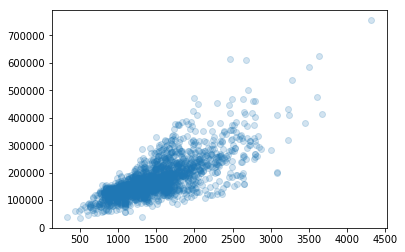

In [68]:
import matplotlib.pyplot as plt
y = subset_df_clean['SalePrice']
x = subset_df_clean['Gr Liv Area']
fig = plt.figure()
plt.scatter(x,y,alpha=0.2)
plt.show()